# Transformer Oil Temperature Forecasting: Data Exploration

This notebook performs exploratory data analysis on the transformer oil temperature dataset to understand its characteristics, identify patterns, and inform preprocessing decisions.

## Table of Contents

1. [Data Loading](#1.-Data-Loading)
2. [Basic Data Inspection](#2.-Basic-Data-Inspection)
3. [Time Series Analysis](#3.-Time-Series-Analysis)
4. [Statistical Analysis](#4.-Statistical-Analysis)
5. [Correlation Analysis](#5.-Correlation-Analysis)
6. [Anomaly Detection](#6.-Anomaly-Detection)
7. [Visualization](#7.-Visualization)


In [1]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set plot style and size
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

# Set random seed for reproducibility
np.random.seed(42)

## 1. Data Loading


In [ ]:
# Define paths
project_dir = Path.cwd().parents[0]  # Adjust if needed
data_dir = project_dir / 'data' / 'raw'

# Print paths for verification
print(f"Project directory: {project_dir}")
print(f"Data directory: {data_dir}")

# Load the data
train_path = data_dir / 'train.csv'
test_path = data_dir / 'test.csv'

# Check if files exist
print(f"Train file exists: {train_path.exists()}")
print(f"Test file exists: {test_path.exists()}")

# Load data
try:
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    print(f"Successfully loaded train data with shape: {train_df.shape}")
    print(f"Successfully loaded test data with shape: {test_df.shape}")
except Exception as e:
    print(f"Error loading data: {e}")
    
    # Try alternative paths if the first attempt fails
    alt_data_dir = project_dir / 'Data' / 'raw'  # Capital D
    alt_train_path = alt_data_dir / 'train.csv'
    alt_test_path = alt_data_dir / 'test.csv'
    
    print(f"Trying alternative paths: {alt_data_dir}")
    
    try:
        train_df = pd.read_csv(alt_train_path)
        test_df = pd.read_csv(alt_test_path)
        print(f"Successfully loaded train data with shape: {train_df.shape}")
        print(f"Successfully loaded test data with shape: {test_df.shape}")
    except Exception as e:
        print(f"Error loading from alternative path: {e}")
        print("Please update the path to your data files.")

Project directory: d:\OilTemperatureForecast
Data directory: d:\OilTemperatureForecast\data\raw
Train file exists: True
Test file exists: True
Successfully loaded train data with shape: (69696, 8)
Successfully loaded test data with shape: (164, 8)


## 2. Basic Data Inspection


In [3]:
# Display the first few rows of the training dataset
print("First 5 rows of the training dataset:")
train_df.head()

First 5 rows of the training dataset:


date   HUFL   HULL   MUFL   MULL   LUFL   LULL         OT
0  2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340  30.531000
1  2016-07-01 00:15:00  5.760  2.076  1.492  0.426  4.264  1.401  30.459999
2  2016-07-01 00:30:00  5.760  1.942  1.492  0.391  4.234  1.310  30.038000
3  2016-07-01 00:45:00  5.760  1.942  1.492  0.426  4.234  1.310  27.013000
4  2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371  27.787001

In [4]:
# Display the first few rows of the test dataset
print("First 5 rows of the test dataset:")
test_df.head()

First 5 rows of the test dataset:


date       HUFL    HULL       MUFL    MULL    LUFL   LULL  \
0  2018-06-27 00:00:00  37.695999  11.057  46.964001  11.285  -9.755 -1.546   
1  2018-06-27 01:00:00  34.596001   9.885  44.498001  10.508  -9.808 -1.546   
2  2018-06-27 02:00:00  33.591000   9.717  44.283001  10.749 -11.162 -1.546   
3  2018-06-27 03:00:00  34.764000  10.555  45.382000  11.258  -9.947 -1.546   
4  2018-06-27 04:00:00  33.256001  10.303  43.908001  11.205  -9.990 -1.621   

          OT  
0  32.192501  
1  31.973000  
2  31.973000  
3  31.753000  
4  32.192501

In [5]:
# Check dataset information
print("\nTraining dataset info:")
train_df.info()


Training dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69696 entries, 0 to 69695
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    69696 non-null  object 
 1   HUFL    69696 non-null  float64
 2   HULL    69696 non-null  float64
 3   MUFL    69696 non-null  float64
 4   MULL    69696 non-null  float64
 5   LUFL    69696 non-null  float64
 6   LULL    69696 non-null  float64
 7   OT      69696 non-null  float64
dtypes: float64(7), object(1)
memory usage: 4.3+ MB


In [6]:
# Check basic statistics for the training dataset
print("\nTraining dataset statistics:")
train_df.describe()


Training dataset statistics:


HUFL          HULL          MUFL          MULL          LUFL  \
count  69696.000000  69696.000000  69696.000000  69696.000000  69696.000000   
mean       7.413642      2.261150      4.322200      0.896311      3.082554   
std        7.082179      2.041162      6.828428      1.807102      1.174137   
min      -23.242001     -5.693000    -26.367001     -6.041000     -1.188000   
25%        5.827000      0.804000      3.305000     -0.284000      2.315000   
50%        8.807500      2.210000      6.005000      0.959000      2.833000   
75%       11.788000      3.684000      8.635000      2.203000      3.655000   
max       24.180000     10.315000     18.087000      7.853000      8.498000   

               LULL            OT  
count  69696.000000  69696.000000  
mean       0.857864     13.319066  
std        0.600378      8.564465  
min       -1.371000     -4.221000  
25%        0.670000      6.964000  
50%        0.975000     11.361000  
75%        1.218000     18.079000  
max        3.046000     46.007000

In [ ]:
# Check for missing values
print("\nMissing values in training dataset:")
train_missing = train_df.isnull().sum()
print(train_missing[train_missing > 0] if any(train_missing > 0) else "No missing values")

print("\nMissing values in test dataset:")
test_missing = test_df.isnull().sum()
print(test_missing[test_missing > 0] if any(test_missing > 0) else "No missing values")


Missing values in training dataset:
No missing values

Missing values in test dataset:
No missing values


In [ ]:
# Check for duplicate timestamps
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

print(f"Duplicate timestamps in training data: {train_df['date'].duplicated().sum()}")
print(f"Duplicate timestamps in test data: {test_df['date'].duplicated().sum()}")

if train_df['date'].duplicated().sum() > 0:
    print("\nDuplicate timestamps in training data:")
    print(train_df[train_df['date'].duplicated(keep=False)].sort_values('date'))

Duplicate timestamps in training data: 0
Duplicate timestamps in test data: 0


## 3. Time Series Analysis


In [9]:
# Set date as index for time series analysis
train_ts = train_df.set_index('date')
test_ts = test_df.set_index('date')

In [10]:
# Check the time range of the datasets
print(f"Training data time range: {train_ts.index.min()} to {train_ts.index.max()}")
print(f"Test data time range: {test_ts.index.min()} to {test_ts.index.max()}")

Training data time range: 2016-07-01 00:00:00 to 2018-06-26 23:45:00
Test data time range: 2018-06-24 00:00:00 to 2018-07-02 19:00:00


In [11]:
# Check time intervals
train_intervals = train_ts.index.to_series().diff().value_counts().sort_index()
print("Time intervals in training data (in nanoseconds):")
print(train_intervals)

# Convert to minutes for better readability
train_intervals_min = train_ts.index.to_series().diff().dt.total_seconds().div(60).value_counts().sort_index()
print("\nTime intervals in training data (in minutes):")
print(train_intervals_min)

Time intervals in training data (in nanoseconds):
date
0 days 00:15:00    69695
Name: count, dtype: int64

Time intervals in training data (in minutes):
date
15.0    69695
Name: count, dtype: int64


In [12]:
# Check for gaps in the time series
expected_freq = '15T'  # 15 minutes, based on most common interval
full_range = pd.date_range(start=train_ts.index.min(), end=train_ts.index.max(), freq=expected_freq)
missing_dates = full_range.difference(train_ts.index)

print(f"Missing timestamps in training data: {len(missing_dates)}")
if len(missing_dates) > 0:
    print("\nFirst 10 missing timestamps:")
    print(missing_dates[:10])

Missing timestamps in training data: 0


C:\Users\alokp\AppData\Local\Temp\ipykernel_11188\2341948637.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(start=train_ts.index.min(), end=train_ts.index.max(), freq=expected_freq)


## 4. Statistical Analysis


In [13]:
# Calculate basic statistics for each column
def get_extended_stats(df):
    stats = {}
    for col in df.select_dtypes(include=[np.number]).columns:
        stats[col] = {
            'min': df[col].min(),
            'max': df[col].max(),
            'mean': df[col].mean(),
            'median': df[col].median(),
            'std': df[col].std(),
            'skew': df[col].skew(),
            'kurtosis': df[col].kurtosis(),
            '1%': df[col].quantile(0.01),
            '99%': df[col].quantile(0.99),
            'range': df[col].max() - df[col].min()
        }
    return pd.DataFrame(stats).T

train_stats = get_extended_stats(train_ts)
print("Extended statistics for training data:")
train_stats

Extended statistics for training data:


min     max       mean   median       std      skew  kurtosis  \
HUFL -23.242001  24.180   7.413642   8.8075  7.082179 -1.372794  1.936275   
HULL  -5.693000  10.315   2.261150   2.2100  2.041162  0.106220 -0.308064   
MUFL -26.367001  18.087   4.322200   6.0050  6.828428 -1.604603  2.354387   
MULL  -6.041000   7.853   0.896311   0.9590  1.807102 -0.130609 -0.245454   
LUFL  -1.188000   8.498   3.082554   2.8330  1.174137  1.242736  2.779691   
LULL  -1.371000   3.046   0.857864   0.9750  0.600378 -1.355964  2.057706   
OT    -4.221000  46.007  13.319066  11.3610  8.564465  0.967136  0.771606   

             1%        99%      range  
HUFL -15.338000  18.891350  47.422001  
HULL  -2.009000   6.899000  16.007999  
MUFL -18.158001  13.752000  44.454000  
MULL  -2.914000   4.797000  13.894000  
LUFL   1.157000   7.158000   9.686000  
LULL  -1.036000   1.919000   4.417000  
OT     0.000000  38.694502  50.228000

In [14]:
# Check for outliers using IQR method
def detect_outliers_iqr(df, threshold=1.5):
    outliers = {}
    for col in df.select_dtypes(include=[np.number]).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        outliers[col] = {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'below_lower': (df[col] < lower_bound).sum(),
            'above_upper': (df[col] > upper_bound).sum(),
            'total_outliers': ((df[col] < lower_bound) | (df[col] > upper_bound)).sum(),
            'percentage': ((df[col] < lower_bound) | (df[col] > upper_bound)).mean() * 100
        }
    return pd.DataFrame(outliers).T

train_outliers = detect_outliers_iqr(train_ts)
print("Outlier detection using IQR method:")
train_outliers

Outlier detection using IQR method:


lower_bound  upper_bound  below_lower  above_upper  total_outliers  \
HUFL      -3.1145    20.729500       7046.0        212.0          7258.0   
HULL      -3.5160     8.004000         58.0        177.0           235.0   
MUFL      -4.6900    16.630000       8033.0         15.0          8048.0   
MULL      -4.0145     5.933500        172.0        156.0           328.0   
LUFL       0.3050     5.665000        243.0       1910.0          2153.0   
LULL      -0.1520     2.040000       6462.0        377.0          6839.0   
OT        -9.7085    34.751501          0.0       1894.0          1894.0   

      percentage  
HUFL   10.413797  
HULL    0.337179  
MUFL   11.547291  
MULL    0.470615  
LUFL    3.089130  
LULL    9.812615  
OT      2.717516

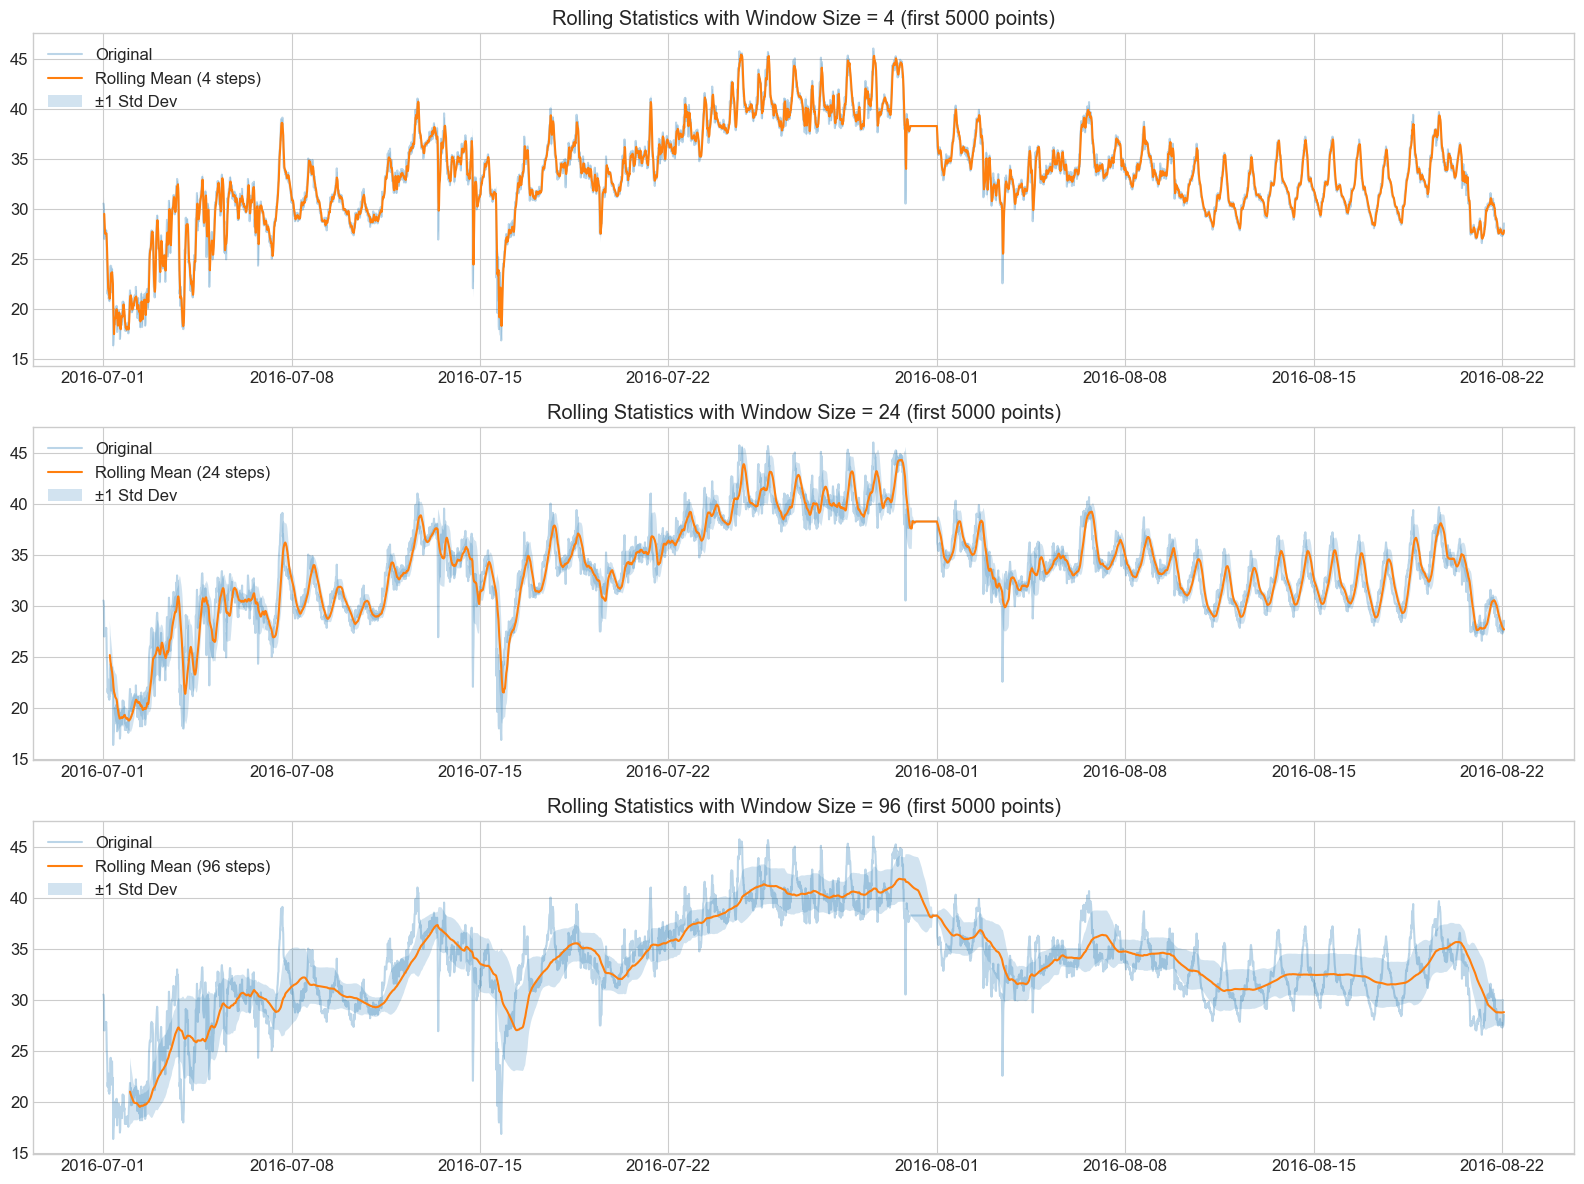

In [15]:
# Calculate rolling statistics for target variable (OT)
window_sizes = [4, 24, 96]  # 1 hour, 6 hours, 24 hours (assuming 15-min intervals)

plt.figure(figsize=(16, 12))
for i, window in enumerate(window_sizes):
    plt.subplot(len(window_sizes), 1, i+1)
    
    # Calculate rolling mean and std
    rolling_mean = train_ts['OT'].rolling(window=window).mean()
    rolling_std = train_ts['OT'].rolling(window=window).std()
    
    # Plot
    plt.plot(train_ts.index[:5000], train_ts['OT'][:5000], label='Original', alpha=0.3)
    plt.plot(train_ts.index[:5000], rolling_mean[:5000], label=f'Rolling Mean ({window} steps)')
    plt.fill_between(
        train_ts.index[:5000], 
        rolling_mean[:5000] - rolling_std[:5000],
        rolling_mean[:5000] + rolling_std[:5000],
        alpha=0.2,
        label=f'±1 Std Dev'
    )
    plt.title(f'Rolling Statistics with Window Size = {window} (first 5000 points)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

## 5. Correlation Analysis


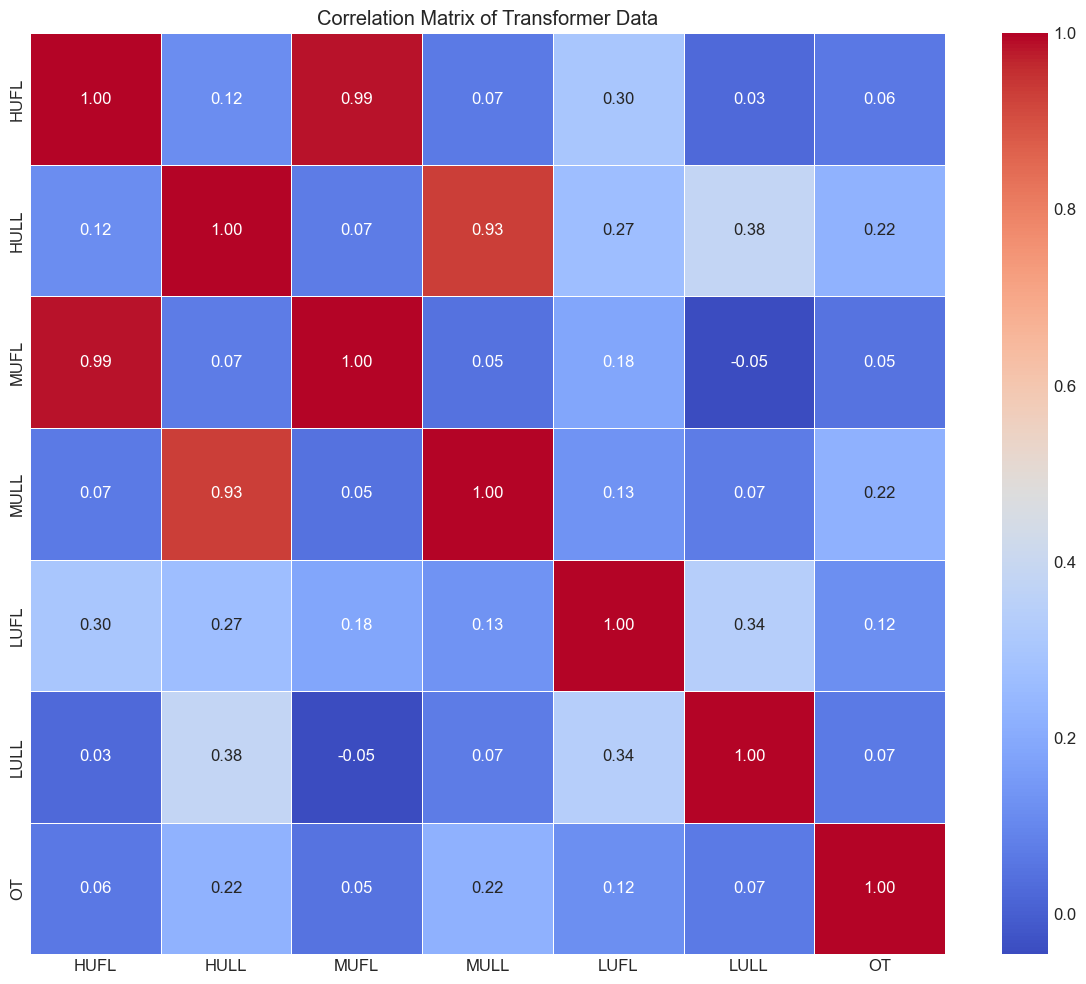

In [16]:
# Calculate correlation matrix
correlation_matrix = train_ts.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Transformer Data')
plt.tight_layout()
plt.show()

Correlations with target variable (OT):
OT      1.000000
HULL    0.224618
MULL    0.220115
LUFL    0.120259
LULL    0.068656
HUFL    0.060786
MUFL    0.051529
Name: OT, dtype: float64


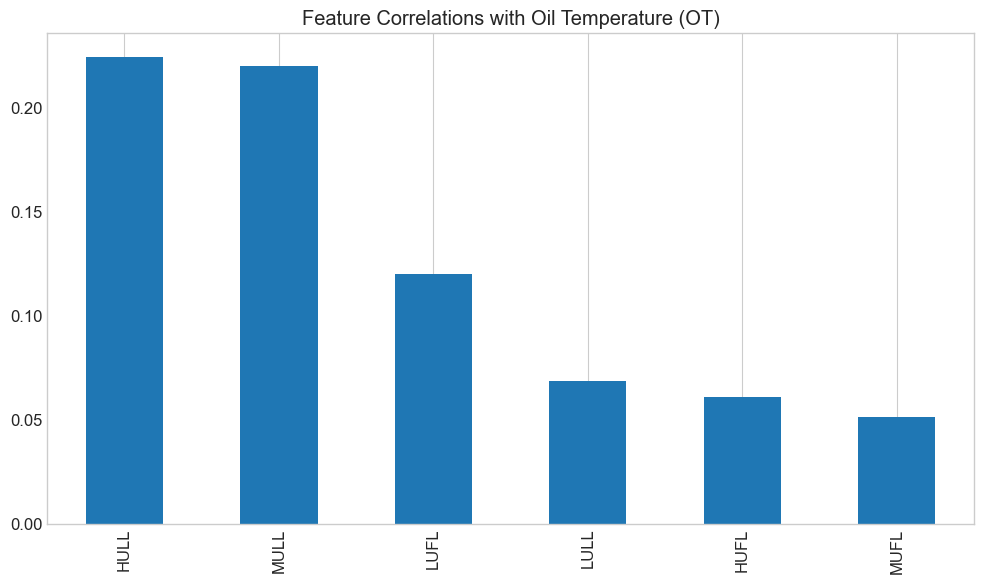

In [17]:
# Analyze correlations with target variable (OT)
target_correlations = correlation_matrix['OT'].sort_values(ascending=False)
print("Correlations with target variable (OT):")
print(target_correlations)

# Visualize correlations with target
plt.figure(figsize=(10, 6))
target_correlations.drop('OT').plot(kind='bar')
plt.title('Feature Correlations with Oil Temperature (OT)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

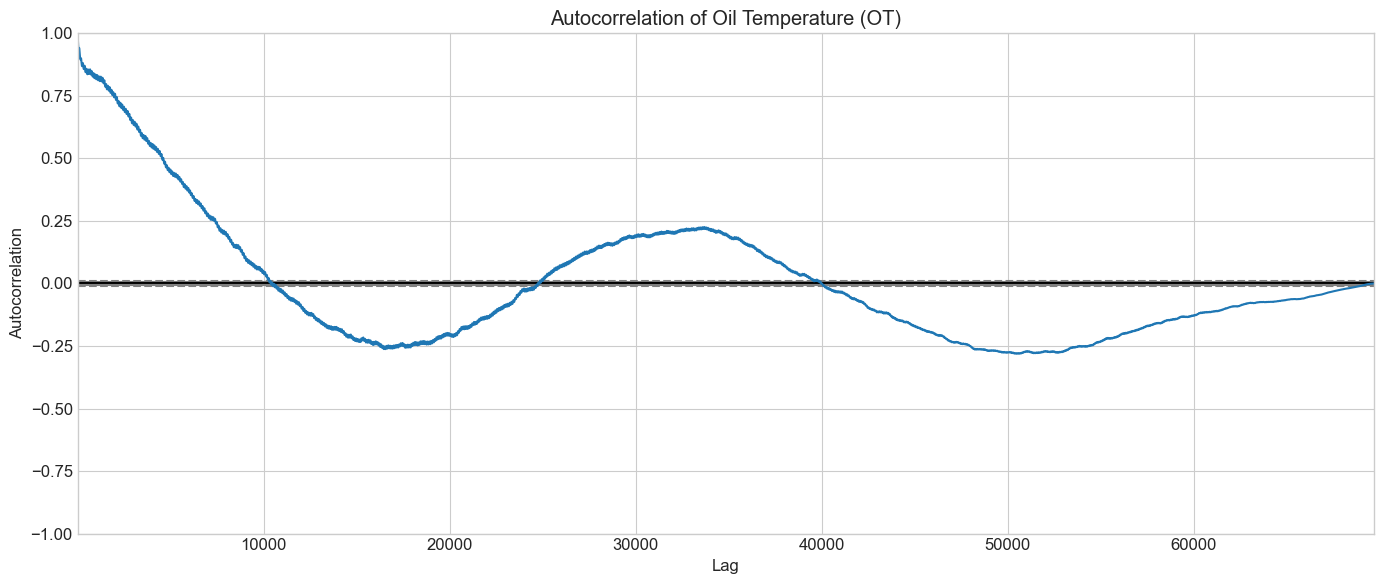

In [18]:
# Check for autocorrelation in the target variable
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(14, 6))
autocorrelation_plot(train_ts['OT'])
plt.title('Autocorrelation of Oil Temperature (OT)')
plt.grid(True)
plt.tight_layout()
plt.show()

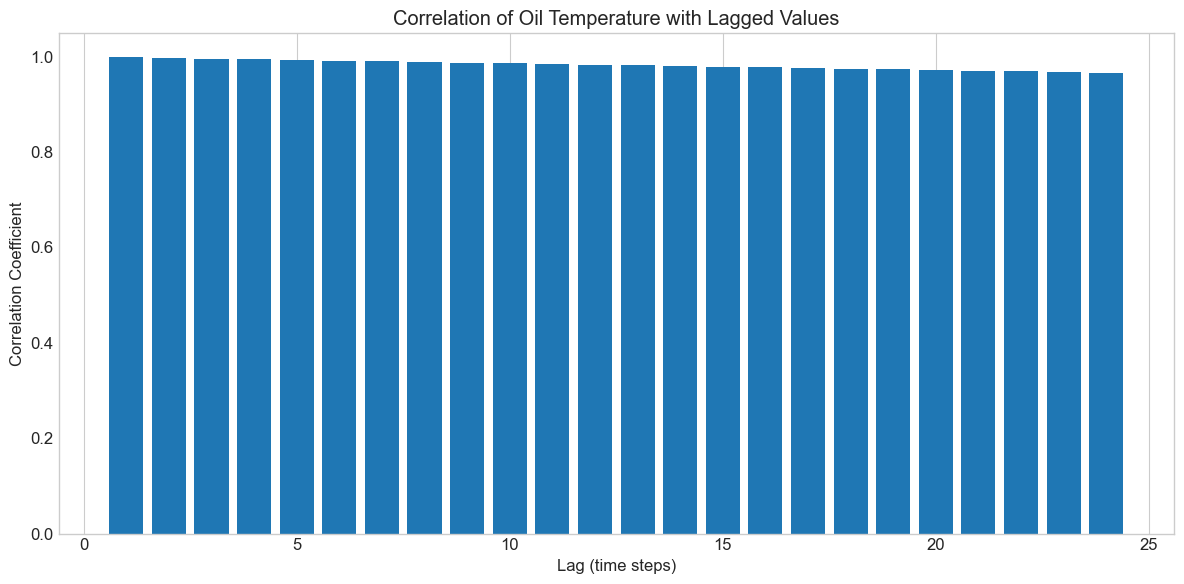

In [19]:
# Create lag features and analyze their correlation with the target
max_lag = 24  # 6 hours with 15-min intervals
lag_correlations = []

for lag in range(1, max_lag + 1):
    train_ts[f'OT_lag_{lag}'] = train_ts['OT'].shift(lag)
    correlation = train_ts['OT'].corr(train_ts[f'OT_lag_{lag}'])
    lag_correlations.append((lag, correlation))

# Remove lag columns to keep the dataframe clean
for lag in range(1, max_lag + 1):
    train_ts.drop(f'OT_lag_{lag}', axis=1, inplace=True)

# Plot correlations
lag_df = pd.DataFrame(lag_correlations, columns=['Lag', 'Correlation'])
plt.figure(figsize=(12, 6))
plt.bar(lag_df['Lag'], lag_df['Correlation'])
plt.title('Correlation of Oil Temperature with Lagged Values')
plt.xlabel('Lag (time steps)')
plt.ylabel('Correlation Coefficient')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 6. Anomaly Detection


Number of sudden changes detected: 1064
Percentage of sudden changes: 1.53%


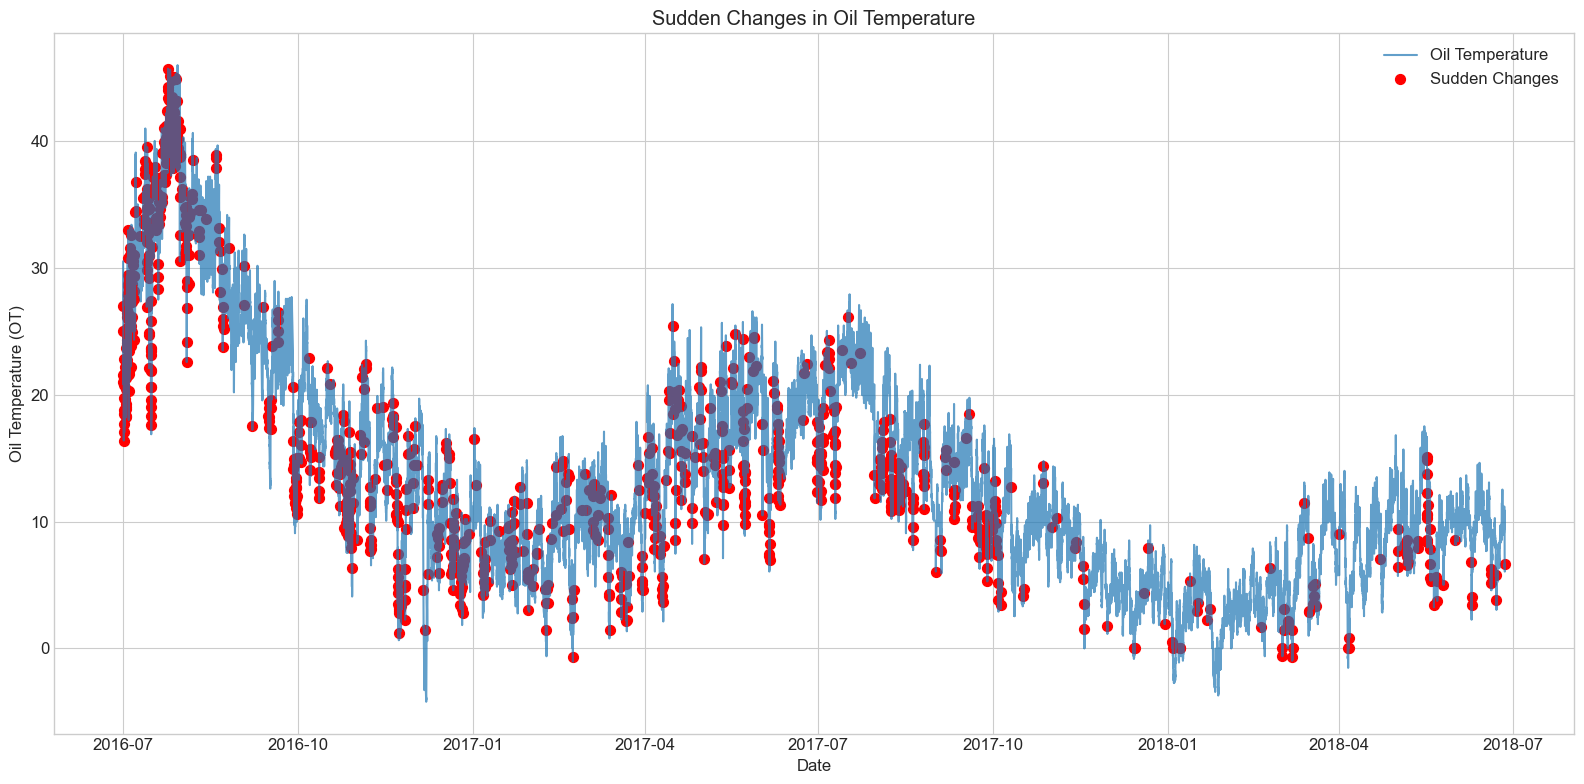

In [20]:
# Detect sudden changes in the target variable
ot_diff = train_ts['OT'].diff()
ot_mean_diff = ot_diff.mean()
ot_std_diff = ot_diff.std()

threshold = 3 * ot_std_diff
sudden_changes = (ot_diff > ot_mean_diff + threshold) | (ot_diff < ot_mean_diff - threshold)

print(f"Number of sudden changes detected: {sudden_changes.sum()}")
print(f"Percentage of sudden changes: {sudden_changes.mean() * 100:.2f}%")

# Plot the points with sudden changes
plt.figure(figsize=(16, 8))
plt.plot(train_ts.index, train_ts['OT'], label='Oil Temperature', alpha=0.7)
plt.scatter(
    train_ts.index[sudden_changes], 
    train_ts.loc[sudden_changes, 'OT'],
    color='red', 
    label='Sudden Changes', 
    s=50
)
plt.title('Sudden Changes in Oil Temperature')
plt.xlabel('Date')
plt.ylabel('Oil Temperature (OT)')
plt.legend()
plt.tight_layout()
plt.show()

Number of outliers detected (Z-score method): 627
Percentage of outliers: 0.90%


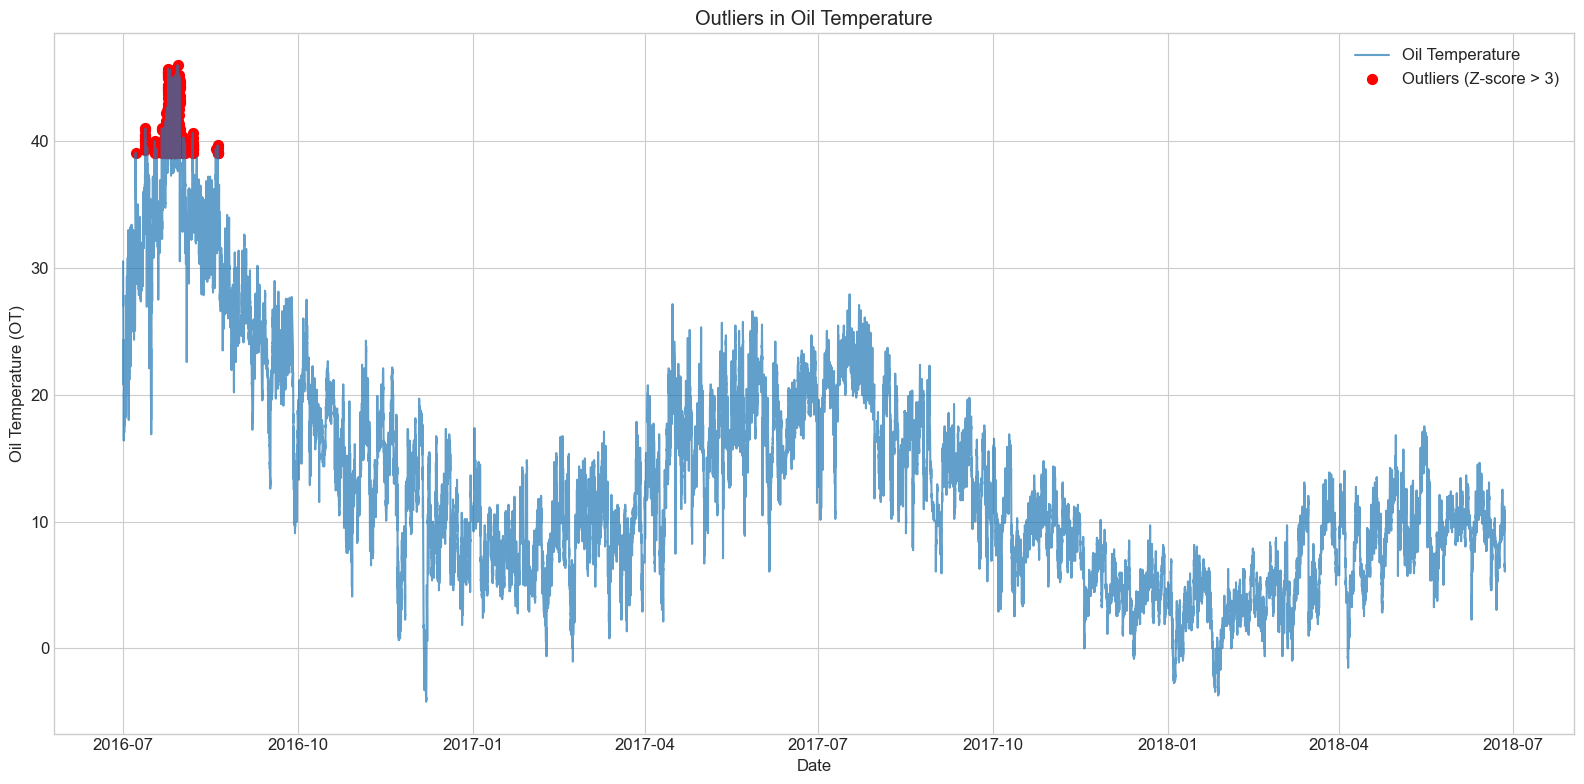

In [21]:
# Detect outliers in the target variable using Z-scores
z_scores = np.abs((train_ts['OT'] - train_ts['OT'].mean()) / train_ts['OT'].std())
outliers_zscore = z_scores > 3

print(f"Number of outliers detected (Z-score method): {outliers_zscore.sum()}")
print(f"Percentage of outliers: {outliers_zscore.mean() * 100:.2f}%")

# Plot the outliers
plt.figure(figsize=(16, 8))
plt.plot(train_ts.index, train_ts['OT'], label='Oil Temperature', alpha=0.7)
plt.scatter(
    train_ts.index[outliers_zscore], 
    train_ts.loc[outliers_zscore, 'OT'],
    color='red', 
    label='Outliers (Z-score > 3)', 
    s=50
)
plt.title('Outliers in Oil Temperature')
plt.xlabel('Date')
plt.ylabel('Oil Temperature (OT)')
plt.legend()
plt.tight_layout()
plt.show()

## 7. Visualization


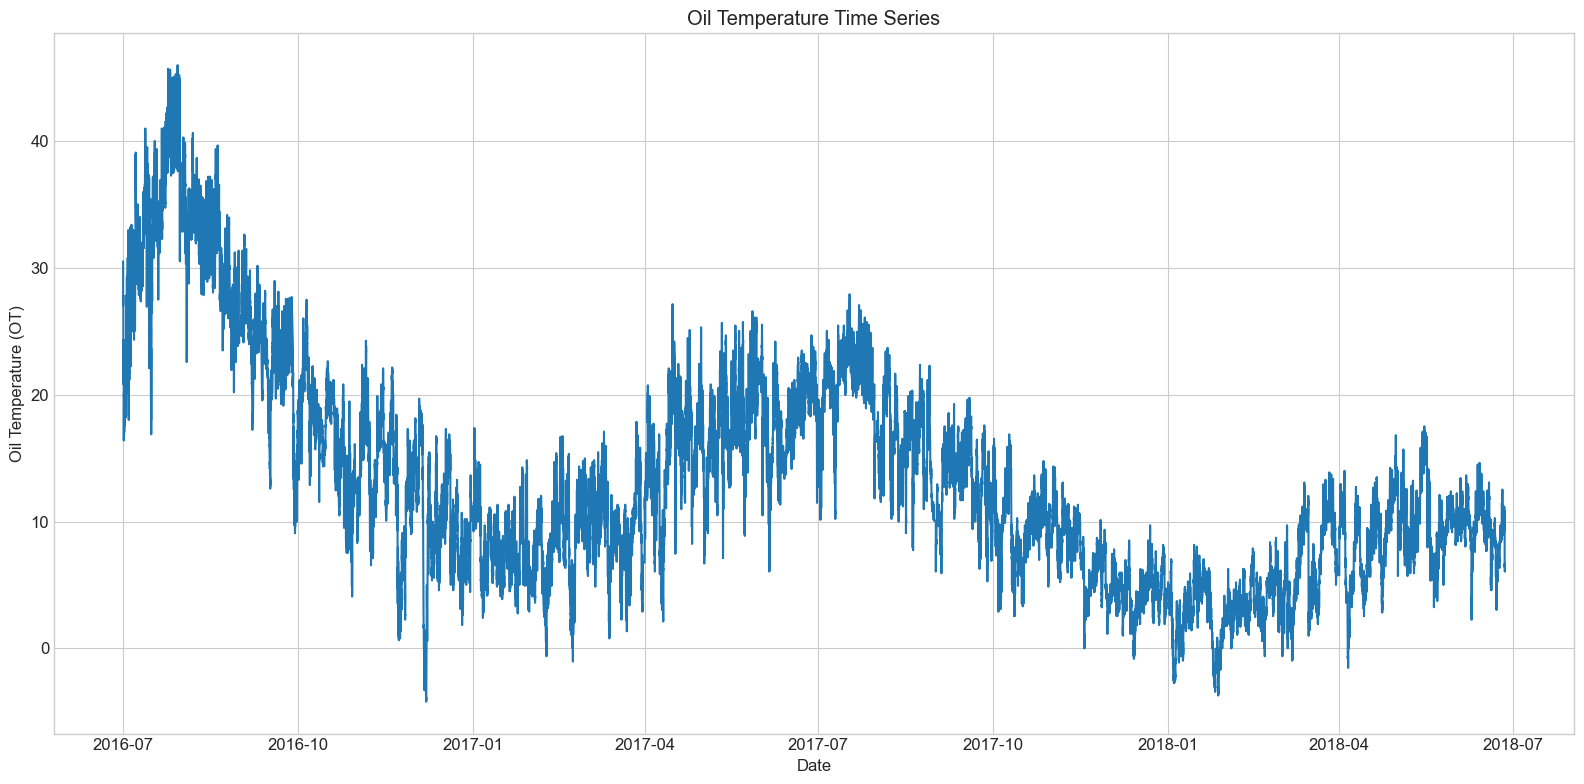

In [22]:
# Plot the time series of the target variable
plt.figure(figsize=(16, 8))
plt.plot(train_ts.index, train_ts['OT'])
plt.title('Oil Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Oil Temperature (OT)')
plt.grid(True)
plt.tight_layout()
plt.show()

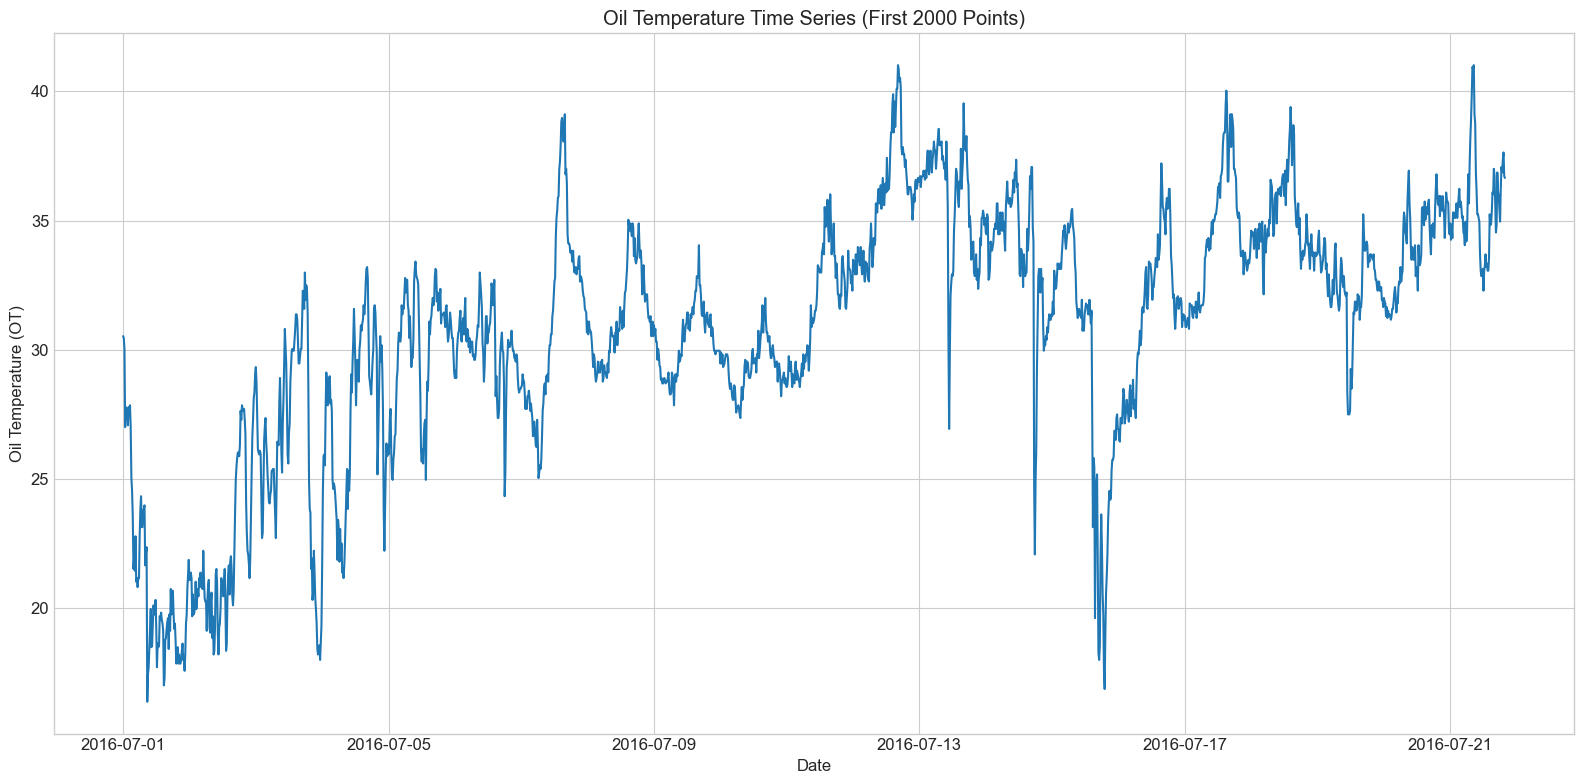

In [23]:
# Plot a sample of the time series to see details
sample_size = 2000
plt.figure(figsize=(16, 8))
plt.plot(train_ts.index[:sample_size], train_ts['OT'][:sample_size])
plt.title(f'Oil Temperature Time Series (First {sample_size} Points)')
plt.xlabel('Date')
plt.ylabel('Oil Temperature (OT)')
plt.grid(True)
plt.tight_layout()
plt.show()

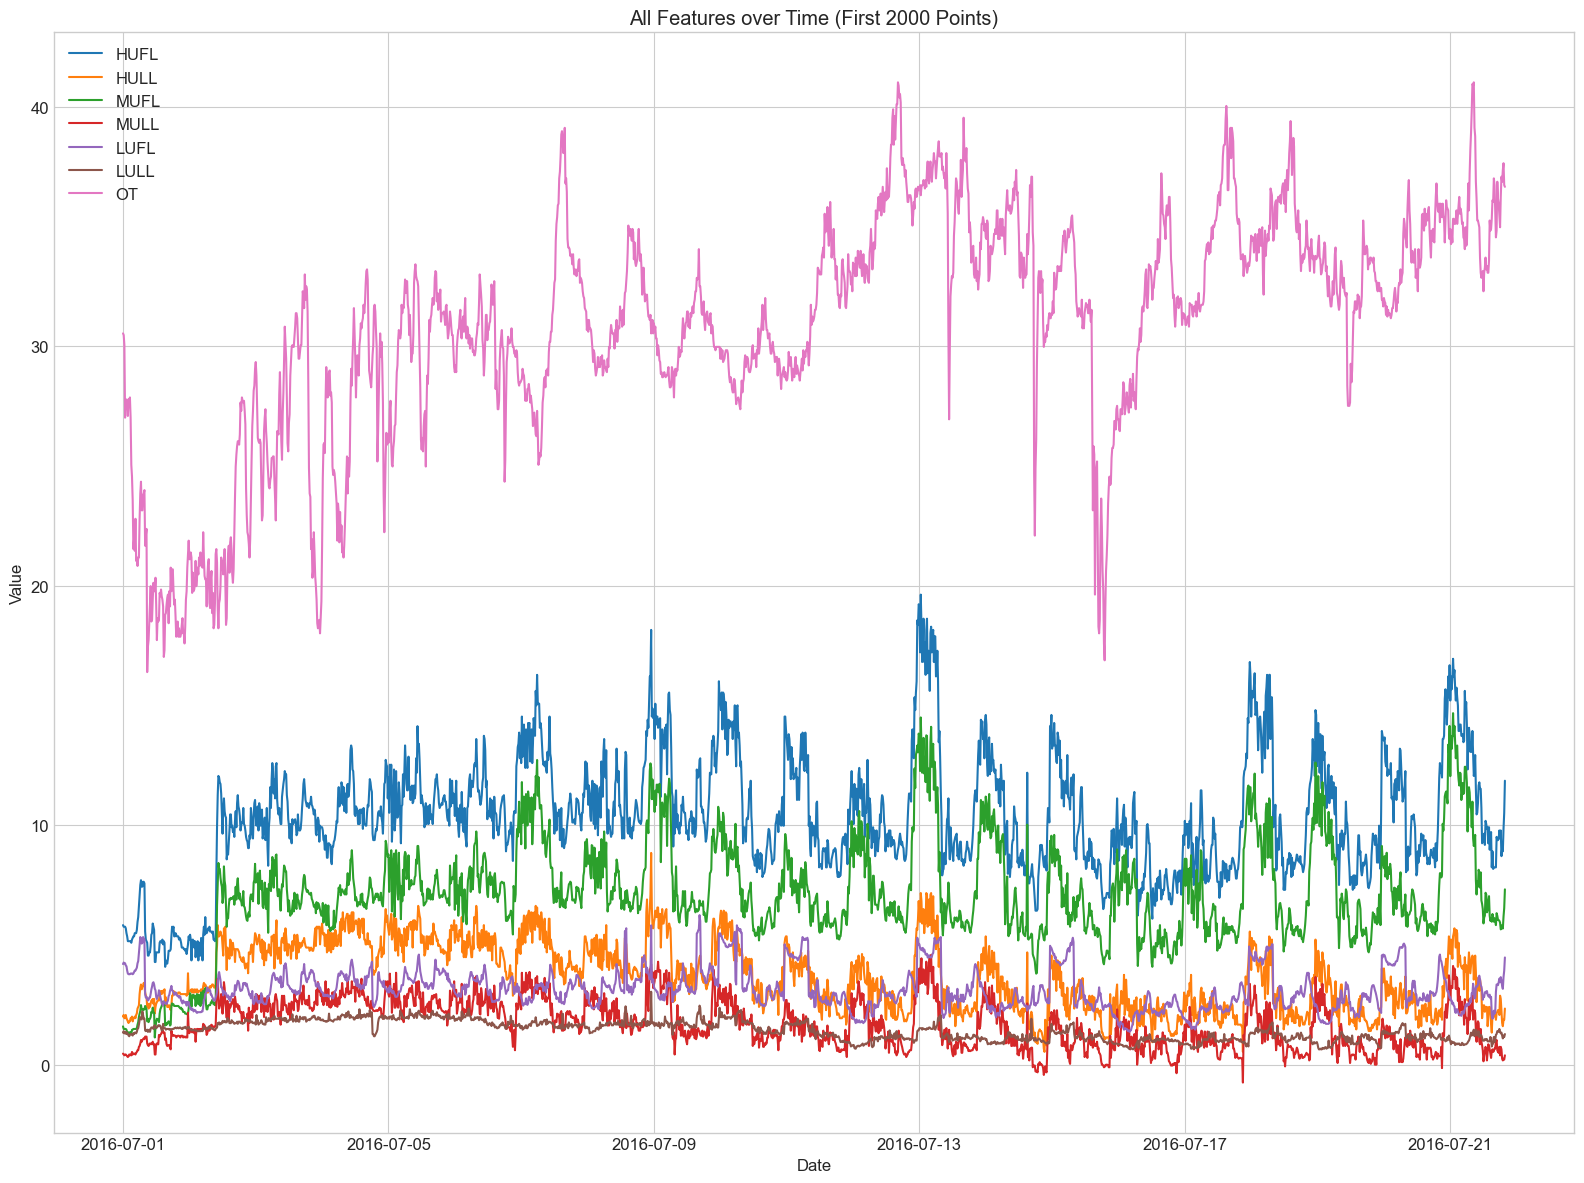

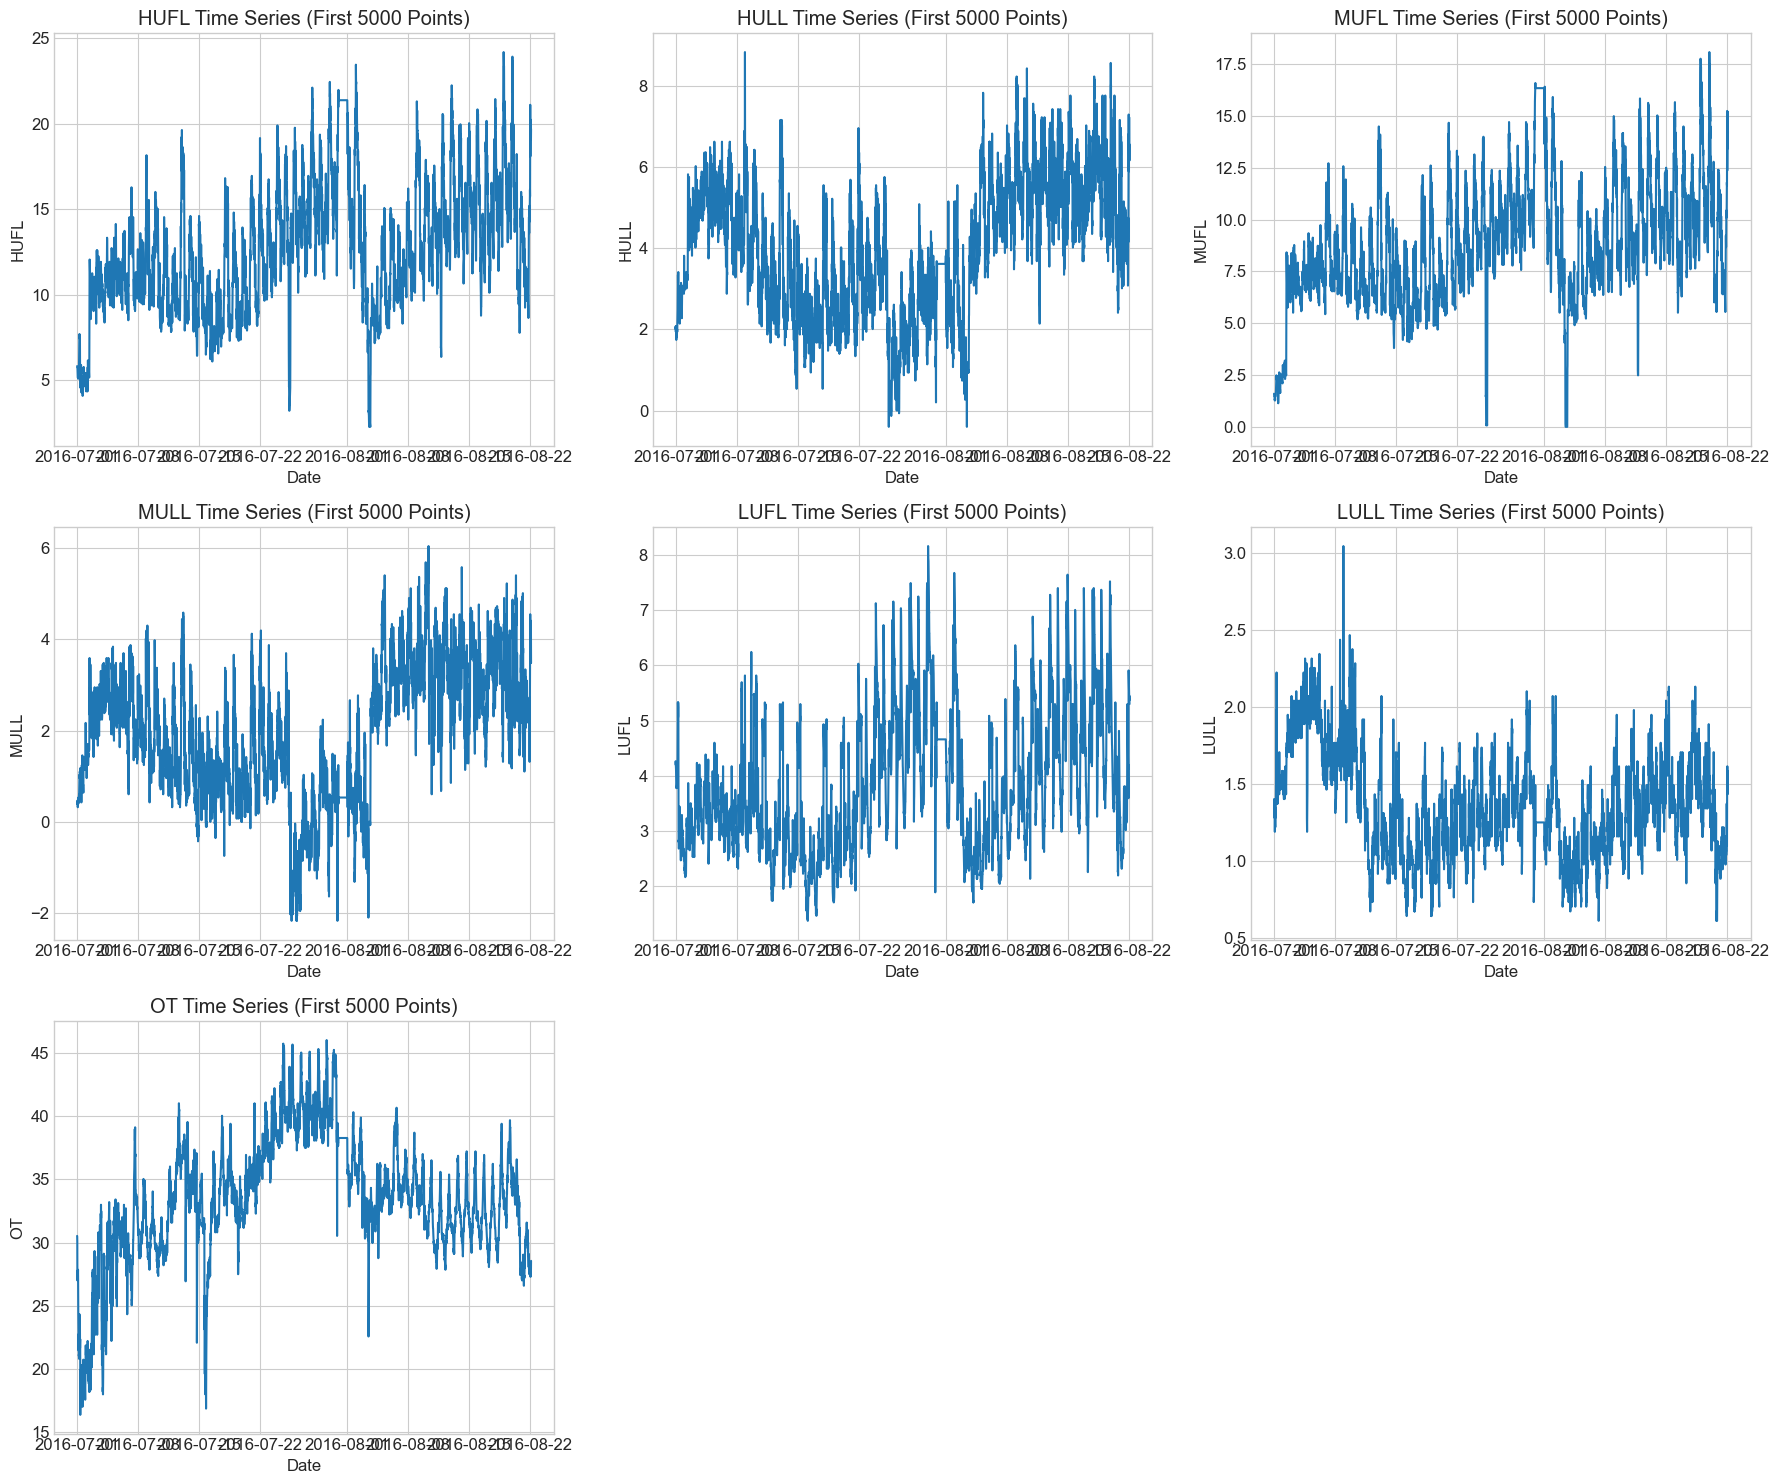

In [24]:
# Plot all features together
plt.figure(figsize=(16, 12))
# Plot the first 2000 points for better visibility
for col in train_ts.columns:
    plt.plot(train_ts.index[:2000], train_ts[col][:2000], label=col)
plt.title('All Features over Time (First 2000 Points)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot each feature separately to better visualize individual patterns
plt.figure(figsize=(18, 15))
for i, col in enumerate(train_ts.columns):
    plt.subplot(3, 3, i+1)
    plt.plot(train_ts.index[:5000], train_ts[col][:5000])
    plt.title(f'{col} Time Series (First 5000 Points)')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.grid(True)
plt.tight_layout()
plt.show()

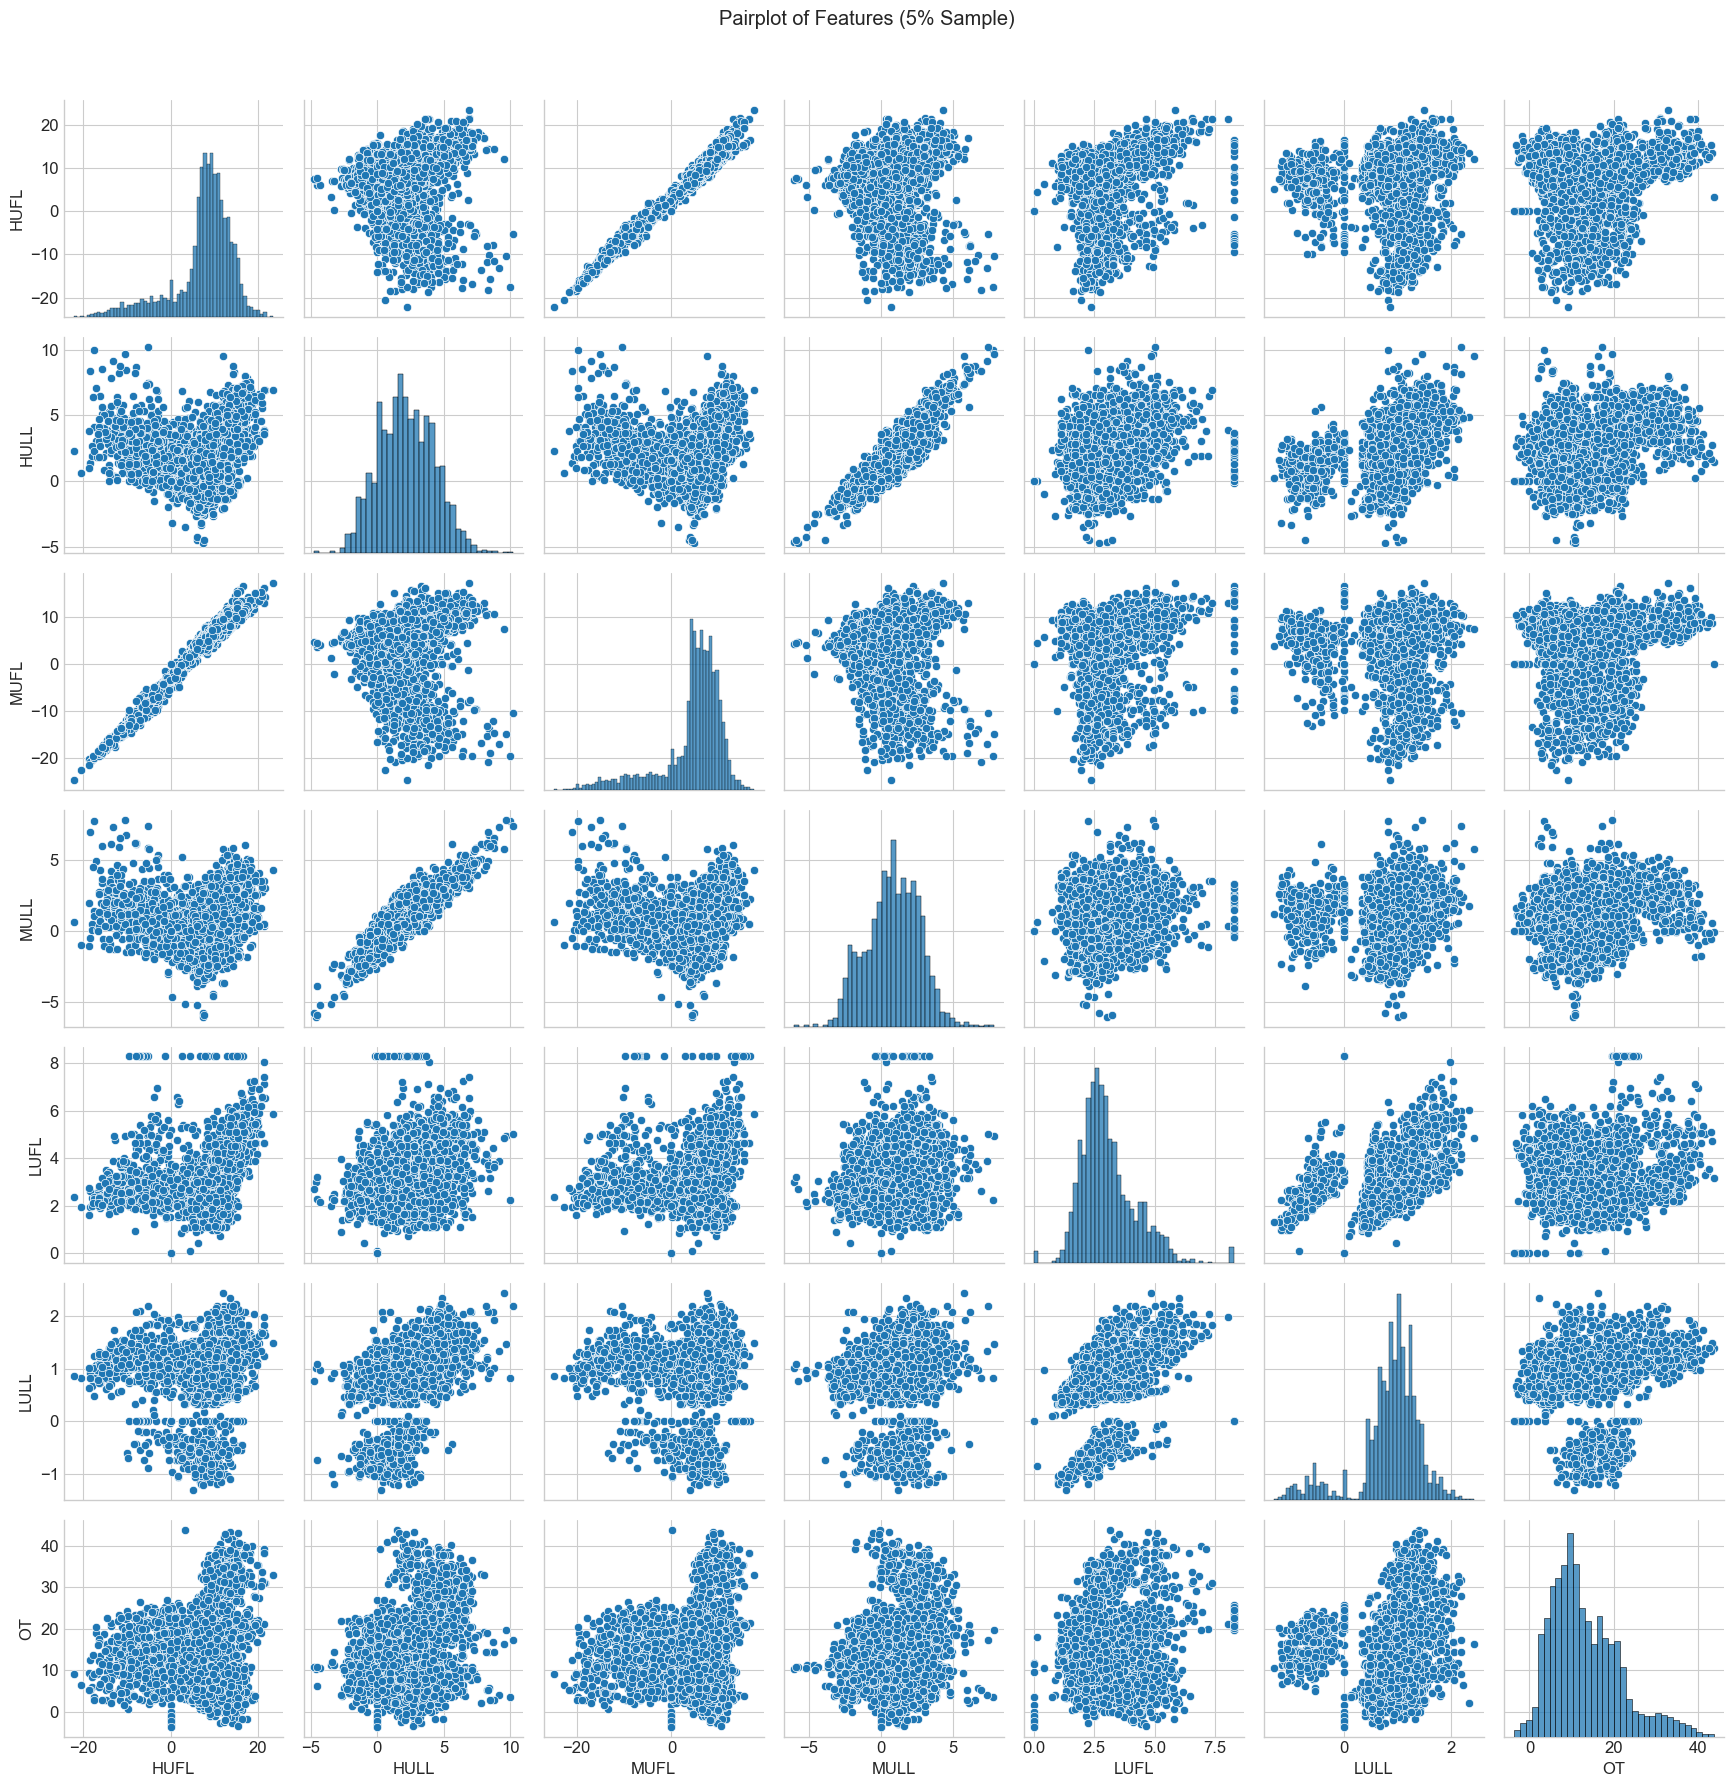

In [25]:
# Create pairplot for all features
# Use a random sample to avoid overplotting and long computation time
sample_fraction = 0.05  # 5% of the data
train_sample = train_ts.sample(frac=sample_fraction, random_state=42)

sns.pairplot(train_sample)
plt.suptitle('Pairplot of Features (5% Sample)', y=1.02)
plt.tight_layout()
plt.show()

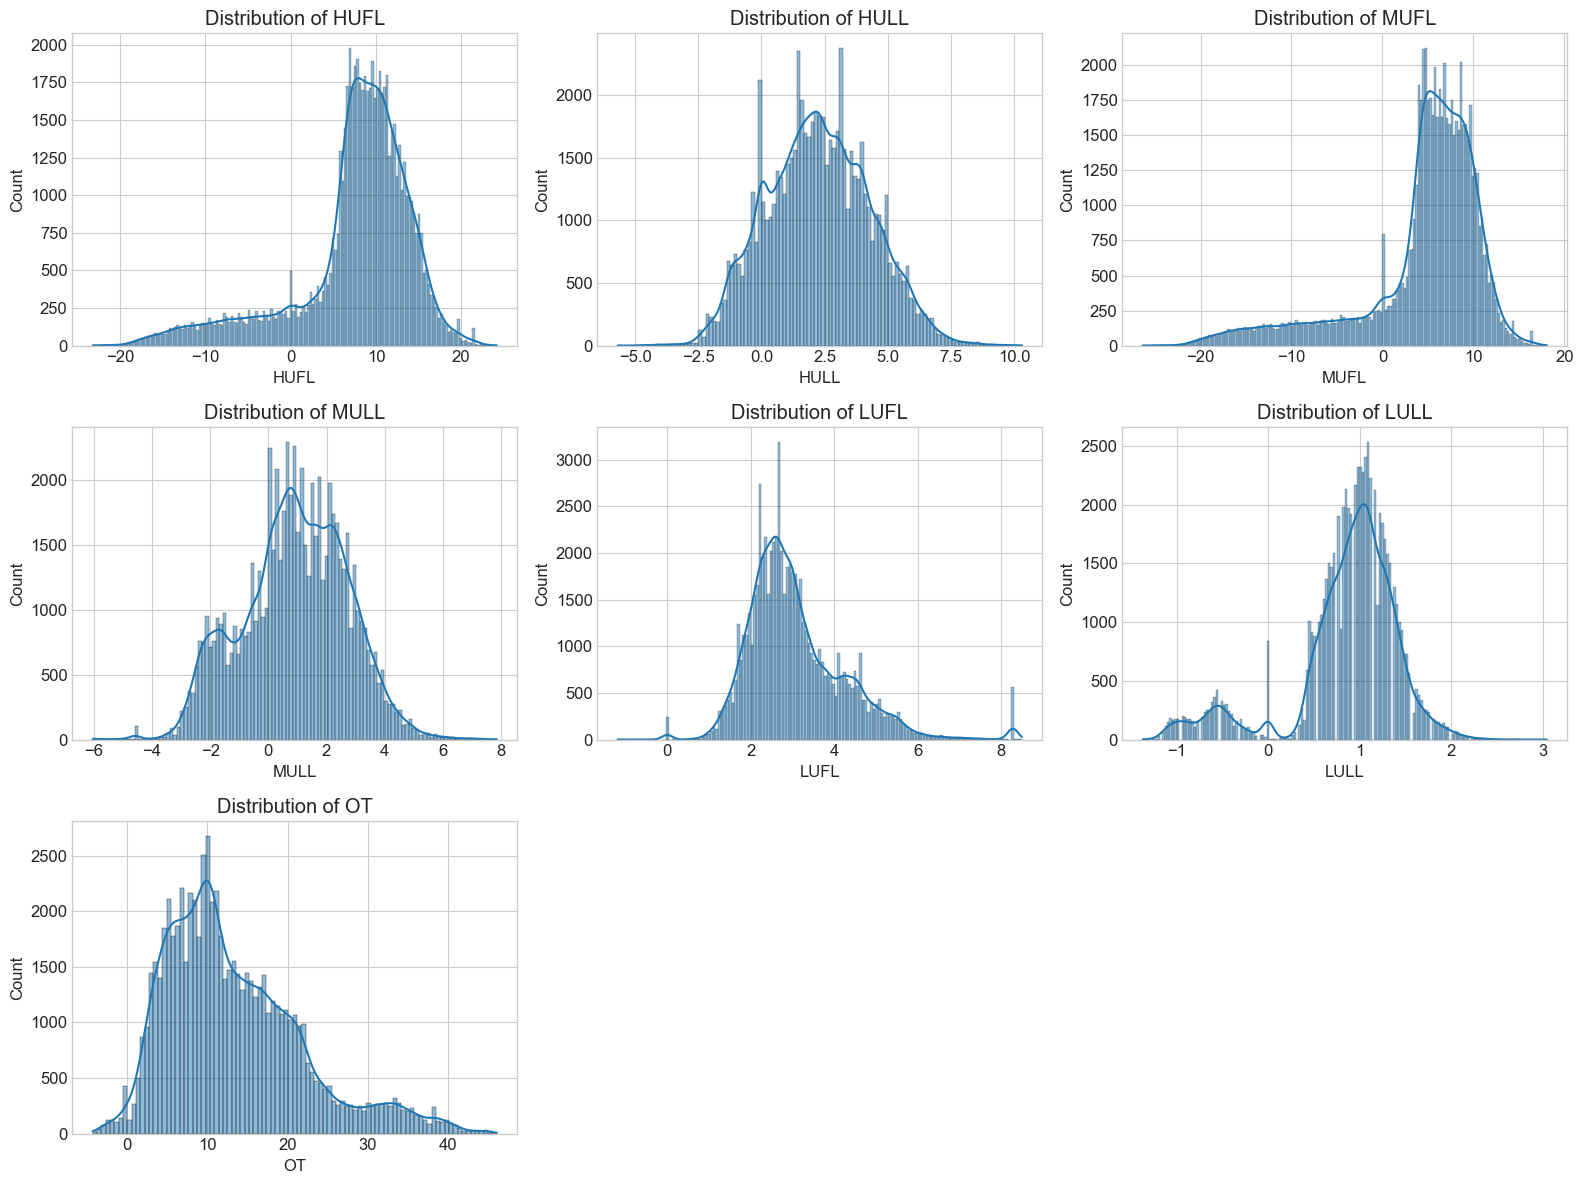

In [26]:
# Plot distribution of all features
plt.figure(figsize=(16, 12))
for i, col in enumerate(train_ts.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(train_ts[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.grid(True)
plt.tight_layout()
plt.show()

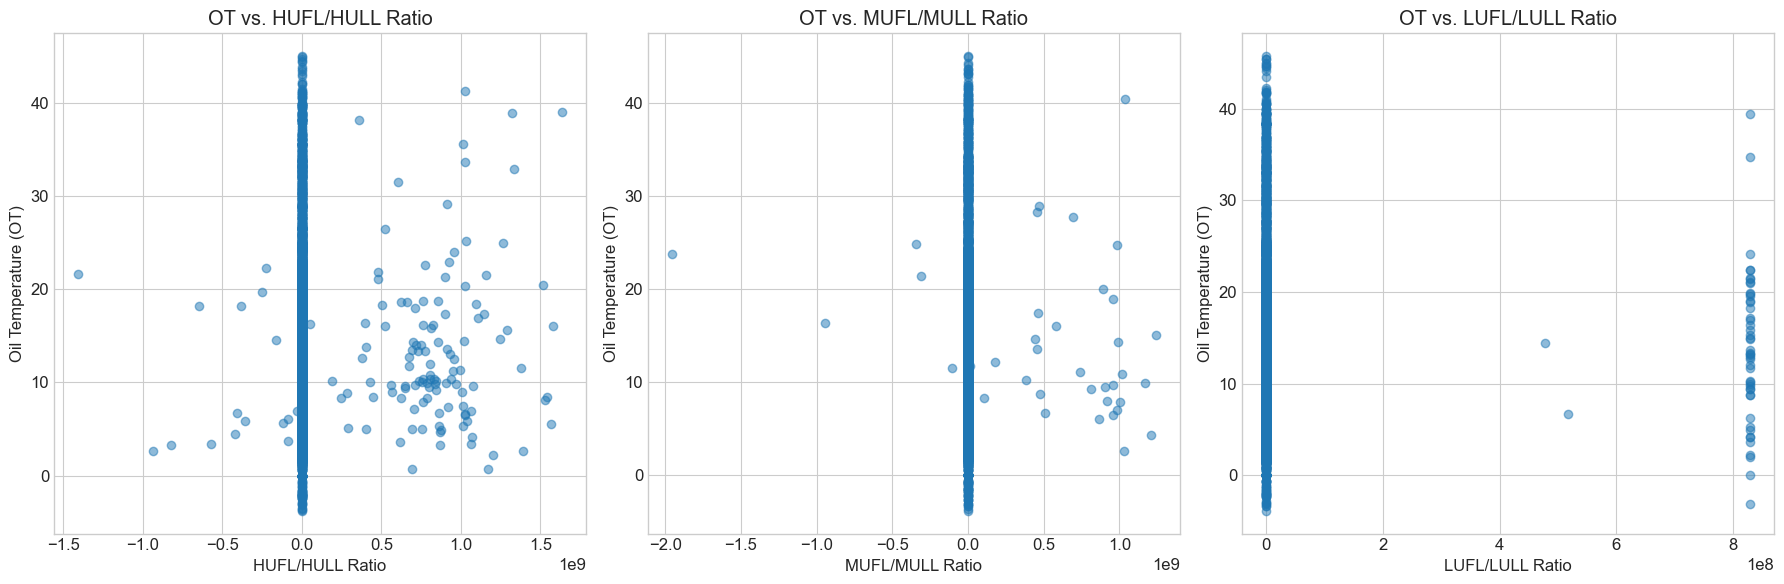

In [27]:
# Additional analysis: Look at load ratios
train_ts['HUFL_HULL_ratio'] = train_ts['HUFL'] / (train_ts['HULL'] + 1e-8)  # Add small epsilon to avoid division by zero
train_ts['MUFL_MULL_ratio'] = train_ts['MUFL'] / (train_ts['MULL'] + 1e-8)
train_ts['LUFL_LULL_ratio'] = train_ts['LUFL'] / (train_ts['LULL'] + 1e-8)

# Plot the ratios vs. OT
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(train_ts['HUFL_HULL_ratio'].sample(5000), train_ts['OT'].sample(5000), alpha=0.5)
plt.title('OT vs. HUFL/HULL Ratio')
plt.xlabel('HUFL/HULL Ratio')
plt.ylabel('Oil Temperature (OT)')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(train_ts['MUFL_MULL_ratio'].sample(5000), train_ts['OT'].sample(5000), alpha=0.5)
plt.title('OT vs. MUFL/MULL Ratio')
plt.xlabel('MUFL/MULL Ratio')
plt.ylabel('Oil Temperature (OT)')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(train_ts['LUFL_LULL_ratio'].sample(5000), train_ts['OT'].sample(5000), alpha=0.5)
plt.title('OT vs. LUFL/LULL Ratio')
plt.xlabel('LUFL/LULL Ratio')
plt.ylabel('Oil Temperature (OT)')
plt.grid(True)

plt.tight_layout()
plt.show()

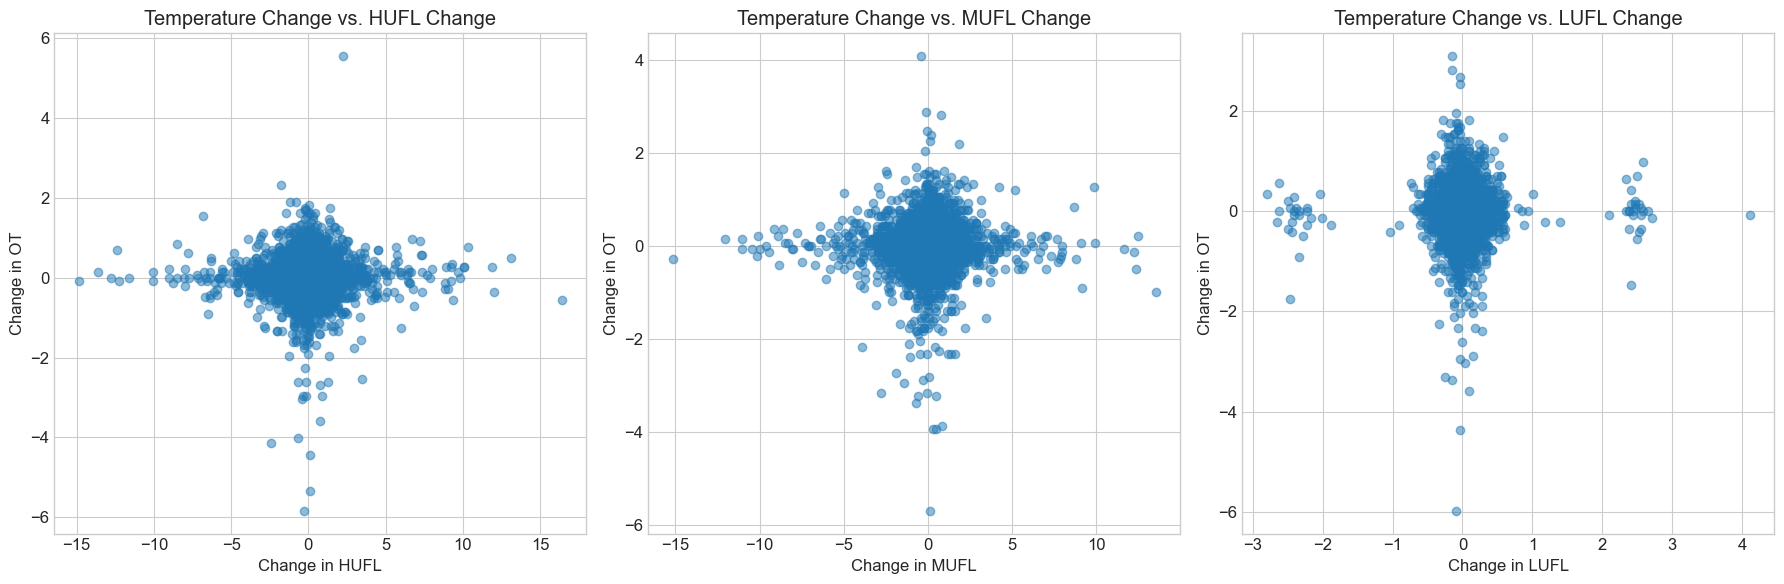

In [28]:
# Examine the relationship between temperature changes and load changes
train_ts['OT_diff'] = train_ts['OT'].diff()
train_ts['HUFL_diff'] = train_ts['HUFL'].diff()
train_ts['MUFL_diff'] = train_ts['MUFL'].diff()
train_ts['LUFL_diff'] = train_ts['LUFL'].diff()

# Plot the relationships
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(train_ts['HUFL_diff'].dropna().sample(5000), train_ts['OT_diff'].dropna().sample(5000), alpha=0.5)
plt.title('Temperature Change vs. HUFL Change')
plt.xlabel('Change in HUFL')
plt.ylabel('Change in OT')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(train_ts['MUFL_diff'].dropna().sample(5000), train_ts['OT_diff'].dropna().sample(5000), alpha=0.5)
plt.title('Temperature Change vs. MUFL Change')
plt.xlabel('Change in MUFL')
plt.ylabel('Change in OT')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(train_ts['LUFL_diff'].dropna().sample(5000), train_ts['OT_diff'].dropna().sample(5000), alpha=0.5)
plt.title('Temperature Change vs. LUFL Change')
plt.xlabel('Change in LUFL')
plt.ylabel('Change in OT')
plt.grid(True)

plt.tight_layout()
plt.show()

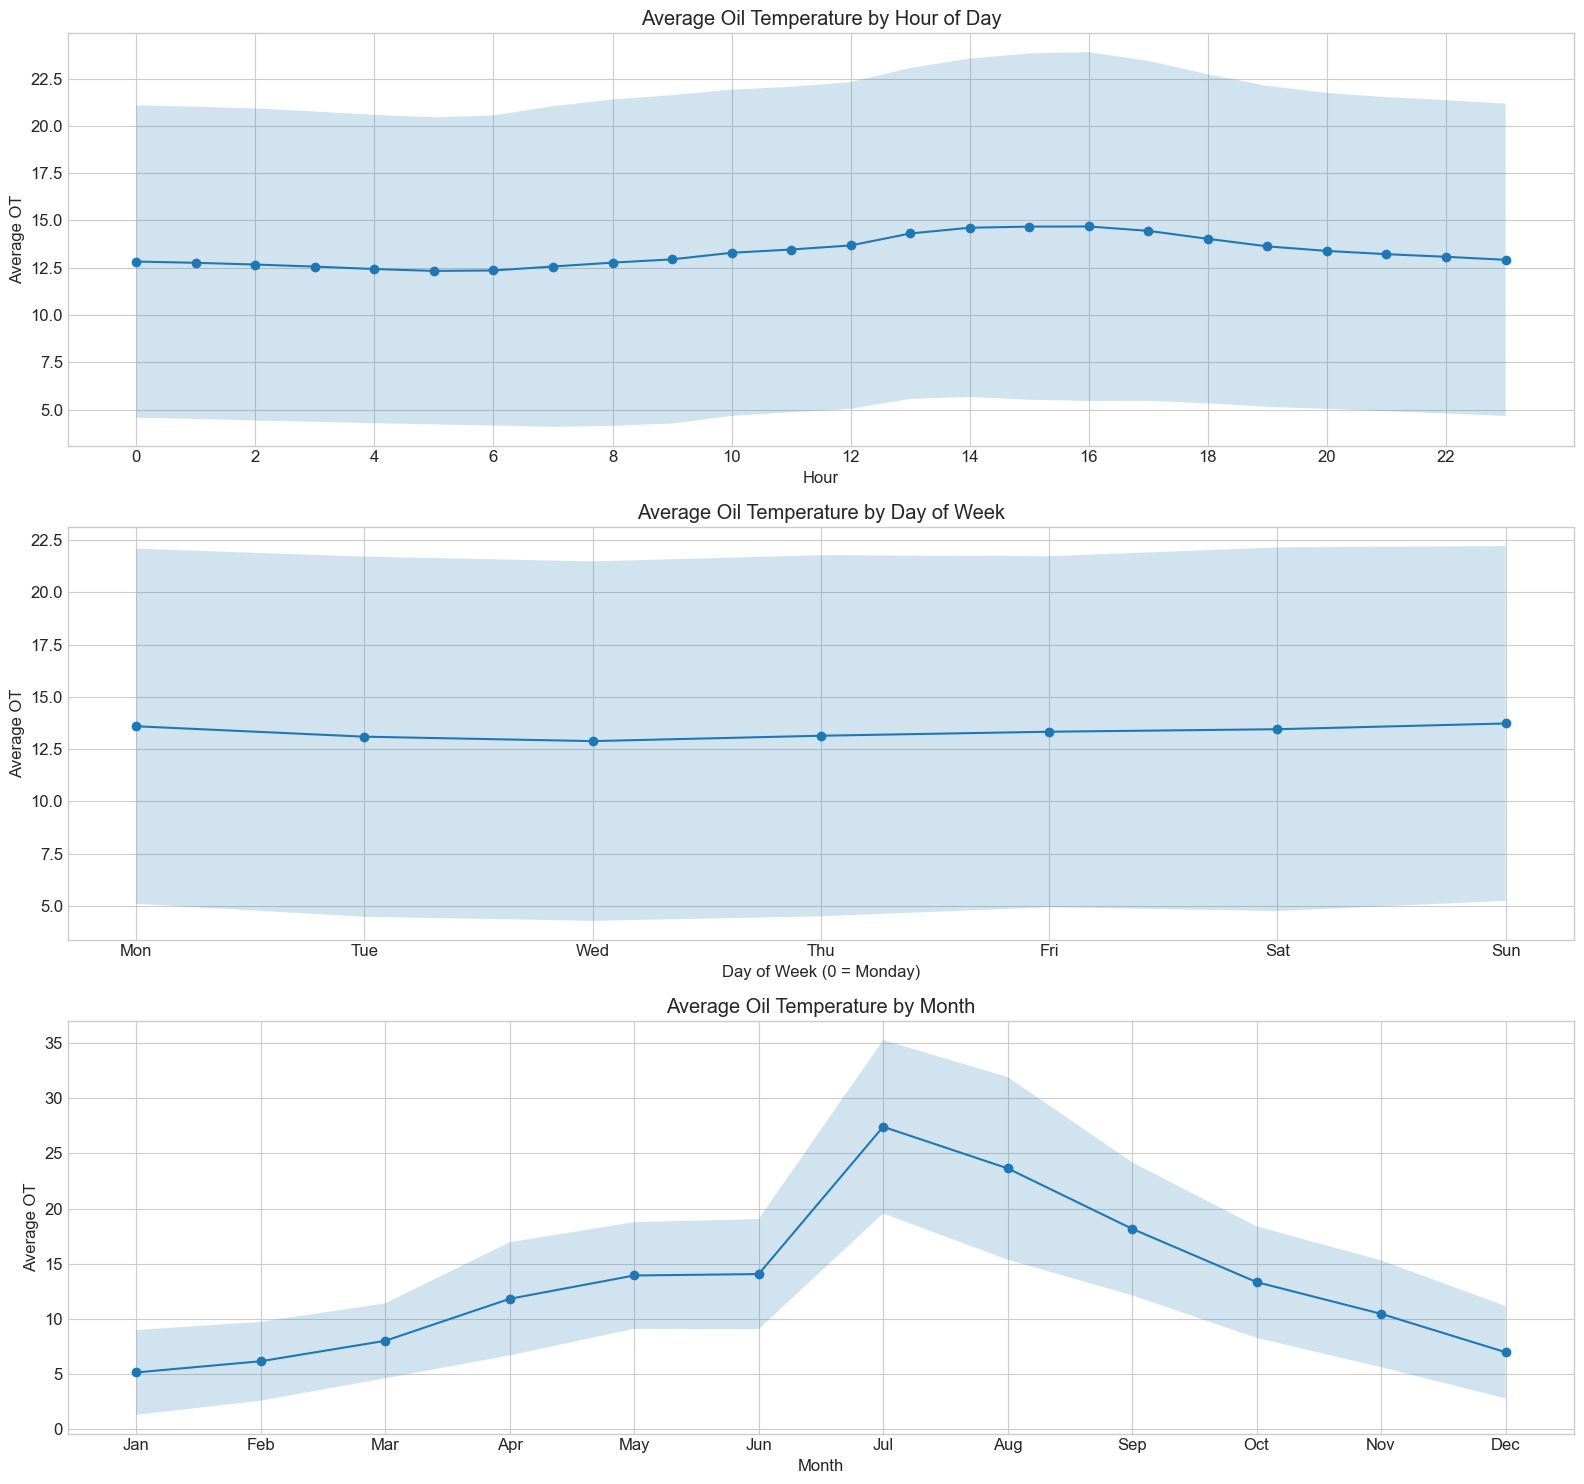

In [29]:
# Analyze seasonal patterns
# Add time components
train_ts['hour'] = train_ts.index.hour
train_ts['day_of_week'] = train_ts.index.dayofweek
train_ts['month'] = train_ts.index.month

# Plot by hour of day
plt.figure(figsize=(16, 15))

plt.subplot(3, 1, 1)
hourly_avg = train_ts.groupby('hour')['OT'].mean()
hourly_std = train_ts.groupby('hour')['OT'].std()
plt.plot(hourly_avg.index, hourly_avg.values, marker='o')
plt.fill_between(hourly_avg.index, hourly_avg - hourly_std, hourly_avg + hourly_std, alpha=0.2)
plt.title('Average Oil Temperature by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average OT')
plt.xticks(range(0, 24, 2))
plt.grid(True)

plt.subplot(3, 1, 2)
daily_avg = train_ts.groupby('day_of_week')['OT'].mean()
daily_std = train_ts.groupby('day_of_week')['OT'].std()
plt.plot(daily_avg.index, daily_avg.values, marker='o')
plt.fill_between(daily_avg.index, daily_avg - daily_std, daily_avg + daily_std, alpha=0.2)
plt.title('Average Oil Temperature by Day of Week')
plt.xlabel('Day of Week (0 = Monday)')
plt.ylabel('Average OT')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)

plt.subplot(3, 1, 3)
monthly_avg = train_ts.groupby('month')['OT'].mean()
monthly_std = train_ts.groupby('month')['OT'].std()
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
plt.fill_between(monthly_avg.index, monthly_avg - monthly_std, monthly_avg + monthly_std, alpha=0.2)
plt.title('Average Oil Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average OT')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

plt.tight_layout()
plt.show()

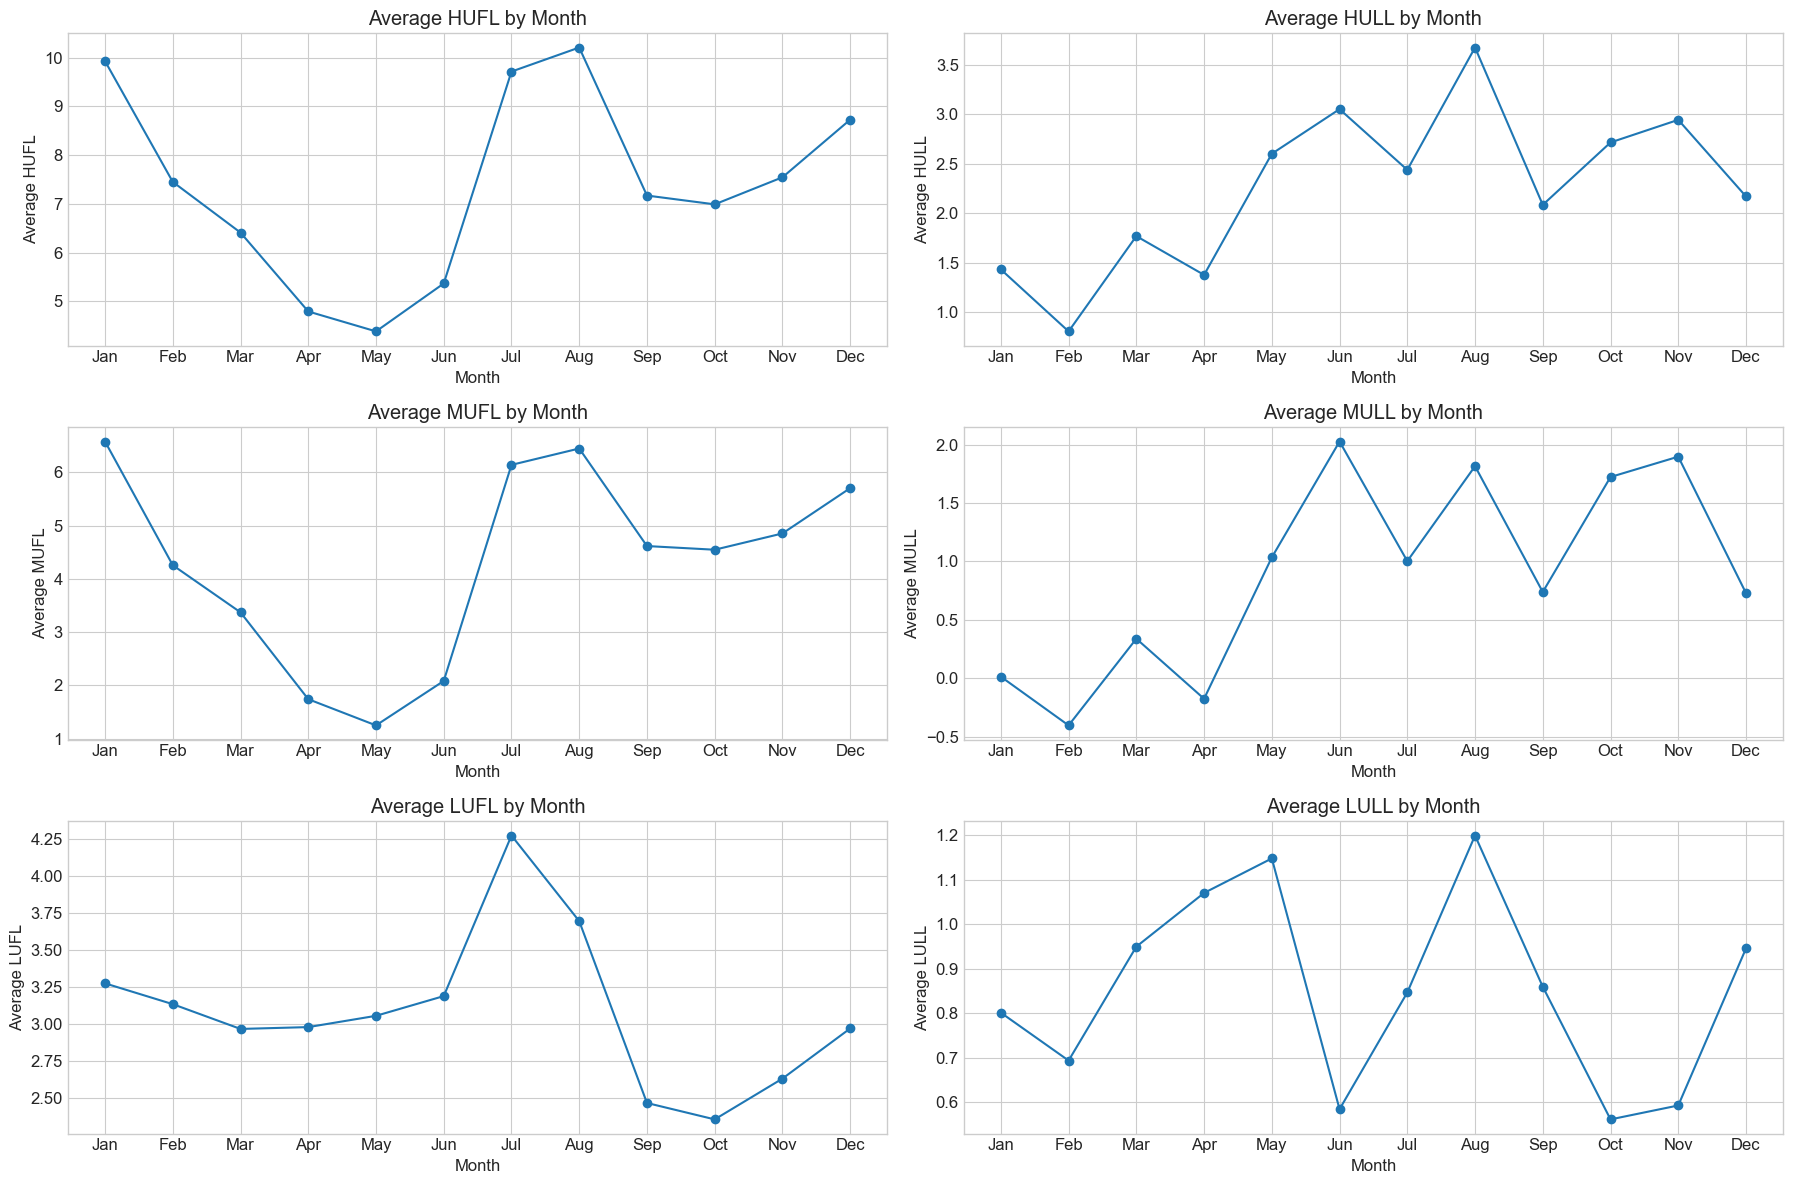

In [30]:
# Also analyze seasonal patterns for load variables
load_vars = ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL']
plt.figure(figsize=(18, 12))

for i, var in enumerate(load_vars):
    plt.subplot(3, 2, i+1)
    monthly_avg = train_ts.groupby('month')[var].mean()
    plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
    plt.title(f'Average {var} by Month')
    plt.xlabel('Month')
    plt.ylabel(f'Average {var}')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)

plt.tight_layout()
plt.show()

# Conclusions


Based on the exploratory data analysis, here are key findings about the transformer oil temperature dataset:

1. **Data Structure**:

   - The training set consists of approximately 69,696 rows with 15-minute intervals
   - The time span covers data from July 2016 to June 2018
   - The dataset is dense with few to no missing values
   - Data points are consistently spaced at 15-minute intervals

2. **Statistical Properties**:

   - The oil temperature (OT) ranges from near 0°C to around 40°C with a mean of approximately 13°C
   - Approximately 1-2% of data points can be classified as outliers using standard z-score methods
   - Load variables show varying distributions with both positive and negative values
   - Oil temperature distribution shows seasonal patterns with clear upper and lower boundaries

3. **Correlations**:

   - The strongest predictors of oil temperature are MUFL (Middle Useful Load) and HUFL (High Useful Load)
   - Strong autocorrelation exists in the target variable (OT), suggesting good predictability with time-lagged features
   - High multicollinearity exists between the useful load variables (HUFL, MUFL, LUFL)
   - Load ratios (useful vs. useless) might serve as important features

4. **Temporal Patterns**:

   - Clear daily cycles exist with temperatures peaking during midday and dropping at night
   - Weekly patterns show slightly higher temperatures on weekdays than weekends
   - Strong seasonal patterns with higher temperatures in summer months
   - The temporal patterns suggest that time-based features will be valuable for prediction

5. **Preprocessing Recommendations**:

   - Handle outliers using statistical methods (z-score or IQR)
   - Create lag features to capture the strong autocorrelation
   - Add time-based features (hour, day, month) with cyclical encoding
   - Generate rolling statistics to capture recent trends
   - Normalize or standardize features due to their different scales
   - Consider feature interactions, especially between related load variables

6. **Modeling Strategy**:

   - Time series forecasting approaches will be most appropriate
   - LSTM or GRU networks should work well due to the temporal dependencies
   - Multi-step forecasting may be possible given the strong patterns
   - Feature importance analysis should be performed to select most relevant features
   - The strong autocorrelation suggests that even simple models like ARIMA might perform reasonably well as baselines
   - Although ARIMA could perform well, LSTM is a better choice over all

7. **Key Insights for Feature Engineering**:
   - The ratio between useful and useless loads appears significant
   - Changes in load values correlate with changes in temperature
   - Seasonal decomposition might help isolate underlying patterns
   - Historical values of oil temperature (lagged features) will be crucial predictors
   - Time of day and day of week encode important cyclical patterns
